In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
train=pd.read_csv("../input/train.csv")

['train.csv', 'sample_submission.csv', 'test.csv', 'data_description.txt']


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


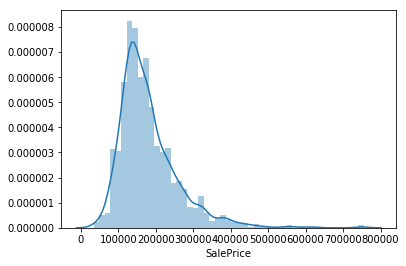

In [2]:
#train.shape
id_train=train["Id"]

#statistics summary
print(train["SalePrice"].describe())
train.drop("Id",axis=1,inplace=True)
sns.distplot(train["SalePrice"])

In [3]:
print("Skewness : "+ str(train["SalePrice"].skew()))
print("kurtosis : "+ str(train["SalePrice"].kurt()))
print("mean : "+ str(train["SalePrice"].mean()))


Skewness : 1.8828757597682129
kurtosis : 6.536281860064529
mean : 180921.19589041095


**Correlation**

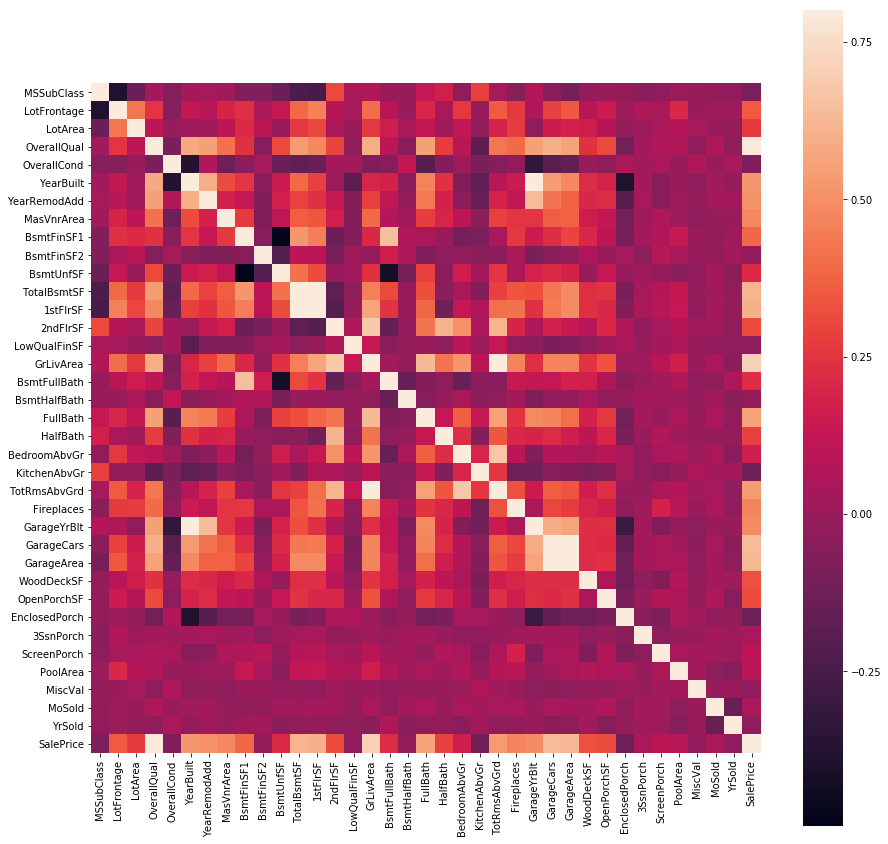

In [5]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True);

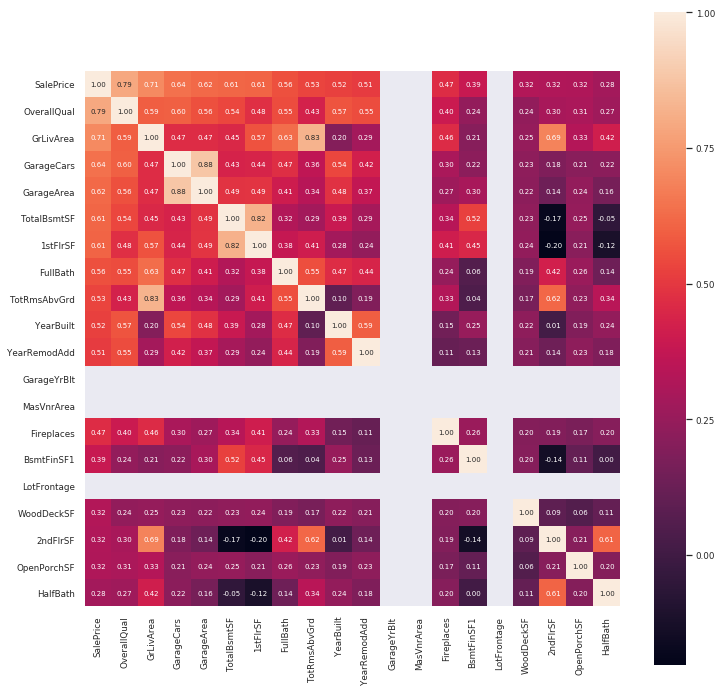

In [23]:
#saleprice correlation matrix
k = 20
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=0.8)
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 7}, yticklabels=cols.values, xticklabels=cols.values)
#plt.figure(figsize=(30,30))
#plt.show()

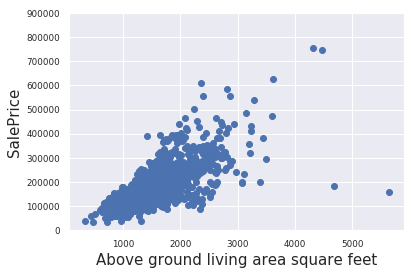

In [24]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Above ground living area square feet', fontsize=15)
plt.ylim(0,900000)
plt.show()

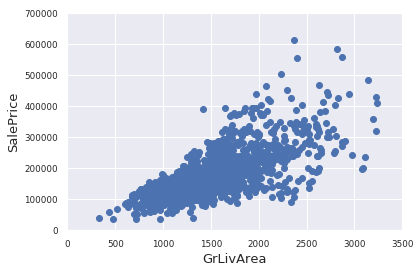

In [25]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>3250)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.ylim(0,700000)
plt.xlim(0,3500)
plt.show()

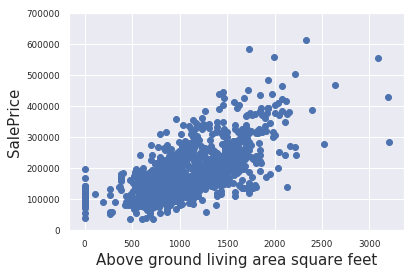

In [26]:
fig, ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Above ground living area square feet', fontsize=15)
plt.ylim(0,700000)
plt.show()

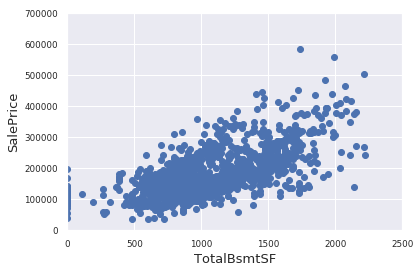

In [27]:
#Deleting outliers
train = train.drop(train[(train['TotalBsmtSF']>2300)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['TotalBsmtSF'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.ylim(0,700000)
plt.xlim(0,2500)
plt.show()

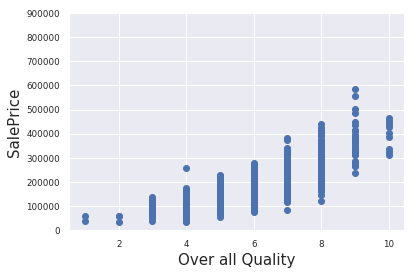

In [28]:
fig, ax = plt.subplots()
ax.scatter(x = train['OverallQual'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Over all Quality', fontsize=15)
plt.ylim(0,900000)
plt.show()

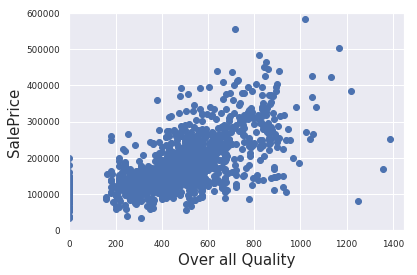

In [31]:
fig, ax = plt.subplots()
ax.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('Over all Quality', fontsize=15)
plt.ylim(0,600000)
plt.xlim(0,1450)
plt.show()